In [160]:
import numpy as np
from matplotlib import pyplot as plt

def plot_histogram (x, y1, y2, xlabel, ylabel, y1title, y2title):
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(1/3))

    max_y = np.max(np.stack((y1, y2)).flatten())
    max_y += max_y*0.1
    x_ticks = np.arange(len(x))
    
    axs[0].bar(x_ticks, y1, width=1, align='edge', linewidth=2, fill=False)
    axs[0].set_xticks(x_ticks)
    axs[0].set_xticklabels(x)
    axs[0].set_xlim([0, len(x)-1])
    axs[0].set_ylim([0, max_y])
    axs[0].set_xlabel(xlabel)
    axs[0].set_ylabel(ylabel)
    axs[0].set_title(y1title)
    
    axs[1].bar(x_ticks, y2, width=1, align='edge', linewidth=2, fill=False)
    axs[1].set_xticks(x_ticks)
    axs[1].set_xticklabels(x)
    axs[1].set_xlim([0, len(x)-1])
    axs[1].set_ylim([0, max_y])
    axs[1].set_xlabel(xlabel)
    axs[1].set_ylabel(ylabel)
    axs[1].set_title(y2title)
    
    return fig, axs

def keep_every_nth_tick (ax, n):
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % n != 0:
            label.set_visible(False)

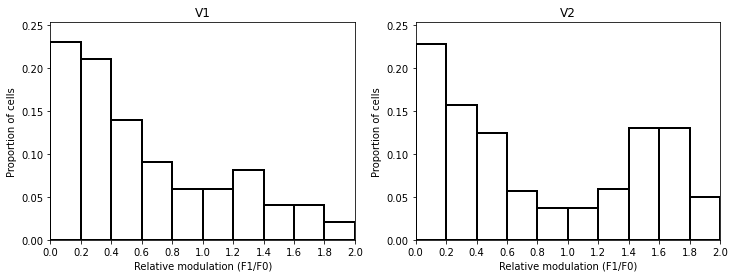

In [151]:
# V1/V2 modulation ratios

modulation_ratio_x = np.array([str(round(i, 2)) for i in np.arange(0, 2.2, 0.2)])
levitt_1994_y = np.array([
    0.22995283018867924,
    0.20990566037735847,
    0.13974056603773585,
    0.09080188679245284,
    0.059551886792452845,
    0.059551886792452845,
    0.08077830188679246,
    0.040094339622641514,
    0.040094339622641514,
    0.020636792452830215,
    0
])
ringach_2002_y = np.array([
    70.11952191235059,
    48.12749003984064,
    38.24701195219123,
    17.370517928286844,
    11.31474103585657,
    11.31474103585657,
    18.167330677290835,
    40,
    40,
    15.298804780876495,
    0
])

ringach_2002_y /= 308;

plot_histogram (
    x=modulation_ratio_x,
    y1=levitt_1994_y,
    y2=ringach_2002_y,
    xlabel='Relative modulation (F1/F0)',
    ylabel='Proportion of cells',
    y1title='V1 (Levitt et al., 1994)',
    y2title='V2 (Ringach et al., 2002)'
);

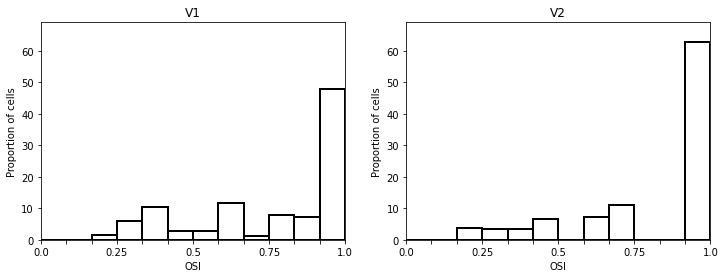

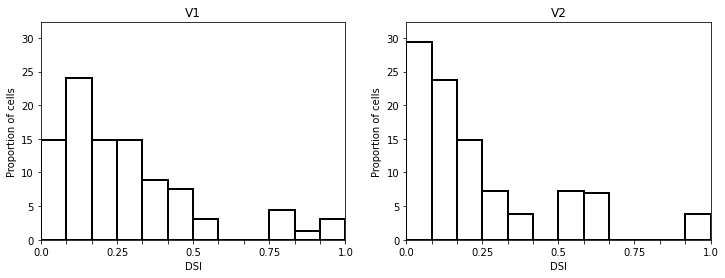

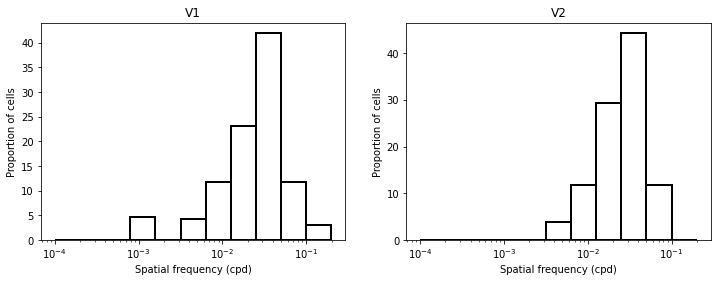

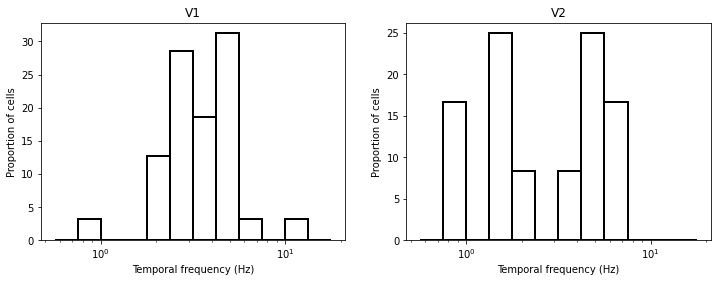

In [260]:
# Van den Berg 2011

# Orientation selective index
OSI_x = np.round(np.arange(0, 1+1/12, 1/12), 2)
V1_OSI_y = np.array([
    0,
    0,
    1.6666666666666718,
    6.111111111111113,
    10.555555555555554,
    2.7777777777777786,
    2.7777777777777786,
    11.66666666666667,
    1.1111111111111143,
    7.777777777777778,
    7.222222222222228,
    47.777777777777786,
    0
])
V2_OSI_y = np.array([
    0,
    0,
    3.888888888888893,
    3.3333333333333353,
    3.3333333333333353,
    6.6666666666666705,
    0,
    7.222222222222228,
    11.111111111111114,
    0,
    0,
    62.77777777777778,
    0
])

fig, axs = plot_histogram (
    x=OSI_x,
    y1=V1_OSI_y,
    y2=V2_OSI_y,
    xlabel='OSI',
    ylabel='Proportion of cells',
    y1title='V1',
    y2title='V2'
);
keep_every_nth_tick(axs[0], 3)
keep_every_nth_tick(axs[1], 3)

# Direction selective index
DSI_x = np.round(np.arange(0, 1+1/12, 1/12), 2)
V1_DSI_y = np.array([
    14.8421052631579,
    24.000000000000004,
    14.8421052631579,
    14.8421052631579,
    8.842105263157897,
    7.578947368421051,
    3.1578947368421053,
    0,
    0,
    4.421052631578946,
    1.2631578947368458,
    3.1578947368421053,
    0
])
V2_DSI_y = np.array([
    29.368421052631575,
    23.684210526315795,
    14.8421052631579,
    7.263157894736845,
    3.7894736842105283,
    0,
    7.263157894736845,
    6.9473684210526345,
    0,
    0,
    0,
    3.7894736842105283,
    0
])
fig, axs = plot_histogram (
    x=DSI_x,
    y1=V1_DSI_y,
    y2=V2_DSI_y,
    xlabel='DSI',
    ylabel='Proportion of cells',
    y1title='V1',
    y2title='V2'
);
keep_every_nth_tick(axs[0], 3)
keep_every_nth_tick(axs[1], 3)

# Spatial frequency
sf_x = np.logspace(-4, -0.7, num=12)
V1_sf_y = np.array([
    0,
    0,
    0,
    4.705882352941169,
    0,
    4.313725490196075,
    11.764705882352944,
    23.13725490196078,
    41.96078431372549,
    11.764705882352944,
    3.1372549019607714
])
V2_sf_y = np.array([
    0,
    0,
    0,
    0,
    0,
    3.9,
    11.764705882352944,
    29.411764705882348,
    44.31372549019609,
    11.764705882352944,
    0
])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(1/3))

axs[0].bar(sf_x[:-1], V1_sf_y, width=np.diff(sf_x), log=True, align='edge', linewidth=2, fill=False)
axs[0].set_xlabel('Spatial frequency (cpd)')
axs[0].set_ylabel('Proportion of cells')
axs[0].set_title('V1')
axs[0].set_xscale("log")
axs[0].set_yscale("linear")

axs[1].bar(sf_x[:-1], V2_sf_y, width=np.diff(sf_x), log=True, align='edge', linewidth=2, fill=False)
axs[1].set_xlabel('Spatial frequency (cpd)')
axs[1].set_ylabel('Proportion of cells')
axs[1].set_title('V2')
axs[1].set_xscale("log")
axs[1].set_yscale("linear")

# Temporal frequency
tf_x = np.logspace(-0.25, 1.25, num=13)
V1_tf_y = np.array([
    0,
    3.168316831683155,
    0,
    0,
    12.673267326732667,
    28.514851485148508,
    18.61386138613861,
    31.287128712871272,
    3.168316831683155,
    0,
    3.168316831683155,
    0
])
V2_tf_y = np.array([
    0,
    16.633663366336627,
    0,
    24.95049504950494,
    8.316831683168314,
    0,
    8.316831683168314,
    24.95049504950494,
    16.633663366336627,
    0,
    0,
    0
])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=plt.figaspect(1/3))

axs[0].bar(tf_x[:-1], V1_tf_y, width=np.diff(tf_x), log=True, align='edge', linewidth=2, fill=False)
axs[0].set_xlabel('Temporal frequency (Hz)')
axs[0].set_ylabel('Proportion of cells')
axs[0].set_title('V1')
axs[0].set_xscale("log")
axs[0].set_yscale("linear")

axs[1].bar(tf_x[:-1], V2_tf_y, width=np.diff(tf_x), log=True, align='edge', linewidth=2, fill=False)
axs[1].set_xlabel('Temporal frequency (Hz)')
axs[1].set_ylabel('Proportion of cells')
axs[1].set_title('V2')
axs[1].set_xscale("log")
axs[1].set_yscale("linear")

Text(0, 0.5, 'Connection probability')

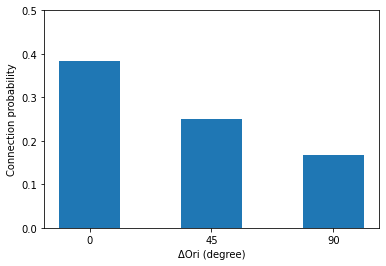

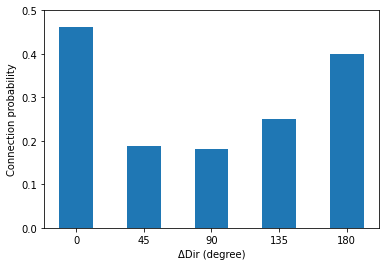

In [272]:
# Ko 2011

orient_x = [0,1,2]
orient_y = np.array([10/26, 11/44, 4/24])

fig, ax = plt.subplots()
ax.bar(orient_x, orient_y, width=0.5)
ax.set_xticks(orient_x)
ax.set_xticklabels(["0", "45", "90"])
ax.set_ylim([0, 0.5])
ax.set_xlabel("ΔOri (degree)")
ax.set_ylabel("Connection probability")

dir_x = [0,1,2,3,4]
dir_y = np.array([6/13, 3/16, 4/22, 4/16, 2/5])

fig, ax = plt.subplots()
ax.bar(dir_x, dir_y, width=0.5)
ax.set_xticks(dir_x)
ax.set_xticklabels(["0", "45", "90", "135", "180"])
ax.set_ylim([0, 0.5])
ax.set_xlabel("ΔDir (degree)")
ax.set_ylabel("Connection probability")